<a href="https://colab.research.google.com/github/taomasgonzalez/Electrocardiogram-LMS/blob/master/Electrocardiogram_anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando anomalías en Electrocardiogramas (ECG)

## Imports

Instalamos las librerías necesarias

In [22]:
!pip install wfdb

Importamos las librerías necesarias

In [0]:
# https://github.com/MIT-LCP/wfdb-python
# https://wfdb.readthedocs.io/en/latest/
import wfdb
import matplotlib.pyplot as plt

Clonamos el repositorio de github:

In [24]:
!git clone "https://github.com/taomasgonzalez/Electrocardiogram-LMS.git"

fatal: destination path 'Electrocardiogram-LMS' already exists and is not an empty directory.


## Obteniendo los datos

Obtenemos los datos de electrocardiogramas realizados a múltiples pacientes del MIT-BIH Arrhythmia Database (https://physionet.org/content/mitdb/1.0.0/).

Para más información sobre su contenido y las particularidades con las que los datos fueron obtenidos, visitar la página.

### Definición de funciones de obtención de datos del dataset

In [0]:
def get_data(file_path, sampto='end'):
  """
  get_data devuelve las señales del primer y segundo canal de un archivo que cumple con el estándar wfdb,
  la metadata del mismo y las anotaciones del mismo en caso de haberlas (archivo con el mismo nombre pero con extensión .atr)
  
  Parámetros:
    file_path: path del archivo de donde conseguir las señales a leer.
    sampto: cantidad de samples a leer. Si 'end', lee todas las samples del archivo.
  Returns 
    signal_0: Señal del primer canal.
    signal_1: Señal del segundo canal.
    metadata: metadata que contiene, entre otras cosas, la sample frequency utilizada para tomar los datos.
    annotation: anotaciones correspondientes al archivo
  """
  # Cada columna de la matriz signals es un canal de las señales grabadas del paciente(signals[0] es el primer canal)
  # metadata tiene información como la sample frequency, importante para el resto del trabajo.
  signals, metadata = wfdb.rdsamp(record_name=file_path, sampto=sampto)
  annotation = wfdb.rdann(record_name=file_path, extension='atr', sampto=sampto)
  
  return signals[:,0], signals[:,1], metadata, annotation

Definimos que archivos obtendremos están presentes en dataset, quer serán los archivos que extraeremos

In [0]:
all_signals = {str(i): dict() for j in (range(100, 125), range(200, 224)) for i in j}
# borramos del dictionary a los archivos que no estan pero que fueron agregados por comodidad
for i in ['110', '120', '204','206','211','216','218']: del all_signals[i]   
all_signals['228'] = None
for i in range(230,235) : all_signals[str(i)] = None

Obtenemos las señales de cada canal, en conjunto con su metadata y las anotaciones que corresponden a la presencia de anomalía o no.

In [0]:
for signal_name in all_signals.keys():
  upper_signal, lower_signal, metadata, annotations =  get_data(file_path='/content/Electrocardiogram-LMS/data/' + signal_name,sampto=None)
  all_signals[signal_name] = {'upper' : upper_signal, 'lower' : lower_signal, 'meta':metadata, 'anot': annotations} 

Visualizamos alguna de las señales:

Hacemos un plot de los primeros 1000 samples de una de las señales de uno de los pacientes

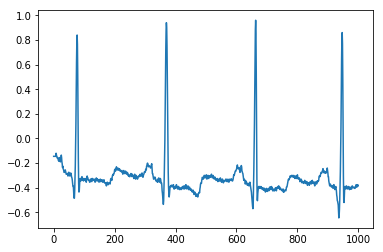

In [38]:
plt.plot(all_signals[list(all_signals.keys())[0]]['upper'][:1000])

In [42]:
print(all_signals[list(all_signals.keys())[0]]['anot'])

## Implementación del filtro adaptativo

In [0]:
def adapt_filter(signal):
  pass

## Probando el filtro

In [0]:
def detect_anomalies():
  pass

## Resultados